# Práctica semanal

## Primer ejercicio: *k*-NN

Retomemos nuestro dataset geográfico de provincias

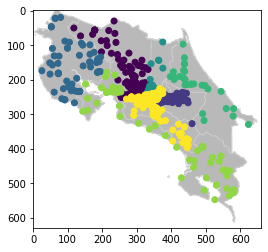

In [46]:
# Cargamos bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import precision_score

# Cargamos el dataset de provincias
provincias_data = pd.read_csv('data/provincias_scaled.csv')

# Y mostramos los puntos en el mapa
# Primero, codifiquemos las provincias en 0-6
le = preprocessing.LabelEncoder()
le.fit(provincias_data['provincia'])
c = le.transform(provincias_data['provincia'])

# Leemos el archivo
im = plt.imread('data/mapaCR.png')
implot = plt.imshow(im)

# Escalamos los arrays en 0-1
p_long = provincias_data['long']
p_lat = provincias_data['lat']

# Dibujamos (con un pequeño offset empírico para que caiga en la imágen)
plt.scatter((im.shape[0]*p_long)*0.95 + 25, (im.shape[1]*(1-p_lat))*0.8 + 20, c=c)
plt.show()

Vamos a probar distintos valores de $k$ en nuestro clasificador *k*-NN para ver su efecto en un dataset multiclase.

In [5]:
# Obtenemos la envolvente convexa del territorio nacional
from scipy.spatial import Delaunay
points = np.array((p_long, p_lat)).T
hull = Delaunay(points)

# Generaremos un grid de prueba filtrado por la envolvente convexa
XX, YY = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
pos = np.vstack([XX.ravel(), YY.ravel()]).T
samples = np.array([x for x in pos if hull.find_simplex(x) >= 0]).T

In [36]:
### EJERCICIO 1 (5pt)
### Entrenar modelos de clasificación KNN para k={1, 3, 5, 10, 30, 100, 200}
## Entrenaremos los modelos usando los datos 'points' contra la variable provincias_data['provincia'] como target
# osea X = points, y = provincias_data['provincia']
# debe generar un modelo para cada K,
# debe obtener el y_prima para cada modelo

from sklearn.neighbors import KNeighborsClassifier

X = points
y = provincias_data['provincia']

arr_k = [1,3,5,10,30,100,200]
predictions_arr = []

for k in arr_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    prediction = knn.predict(samples.T)
    predictions_arr.append(prediction)

print('Predictions created: ',len(predictions_arr))

Predictions created:  7


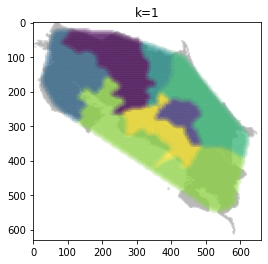

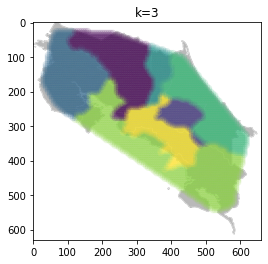

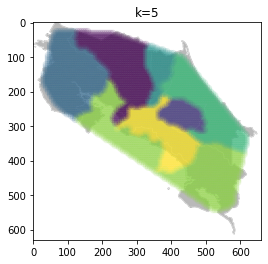

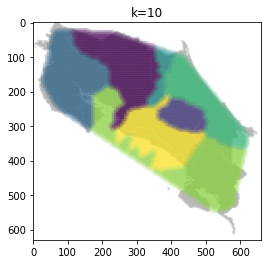

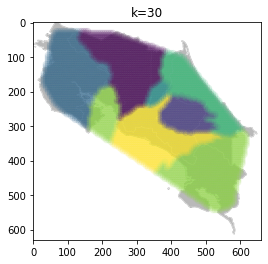

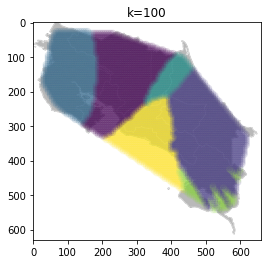

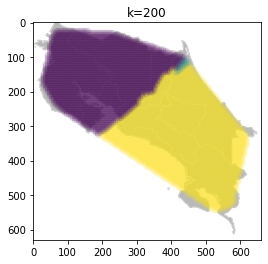

In [42]:
### Utilice esta celda para probar los resultados de sus modelos ###
# imprima el mapa de costa rica con cada y_prima obtenida en el ejercicio 1.

# ejemplo del codigo a utilizar
# debe imprimir el mapa para cada modelo generado en el ejercicio 1
index = 0
for i, y_prima in enumerate(predictions_arr):
    im = plt.imread('data/mapaCR.png')
    implot = plt.imshow(im)
    plt.scatter((samples[0]*im.shape[0])*0.95 + 25, ((1.0-samples[1])*im.shape[1])*0.8 + 20,c=le.transform(y_prima), alpha=0.1)
    plt.title("k="+ str(arr_k[i]))
    index = index+1
    plt.show()


## Segundo ejercicio: reducción de la dimensionalidad

Utilizaremos un dataset llamado ``waveform``, que tiene 40 columnas numéricas para clasificar formas de onda en tres clases ``0``, ``1`` y ``2``. 

In [43]:
# Leemos el dataset
waveform = pd.read_csv('data/waveform.csv')

# Tomamos las columnas independientes
wave_x_all = np.array(waveform.loc[:, waveform.columns != 'class'])

# Y la dependiente
wave_y_all = np.array(waveform['class'])

# Los separamos en dos conjuntos entrenamiento/pruebas
wave_x_train = wave_x_all[:4000]
wave_y_train = wave_y_all[:4000]
wave_x_test = wave_x_all[4000:]
wave_y_test = wave_y_all[4000:]

In [47]:
## EJERCICIO 1 (1pt): Entrenar un modelo k-NN con k=10 y reportar la precisión (accuracy)
## Debe dar 0.826
k=10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(wave_x_train,wave_y_train)
y_prima = knn.predict(wave_x_test)
print('Precisión: ',precision_score(wave_y_test, y_prima, average='macro'))

Precisión:  0.8271764608215757


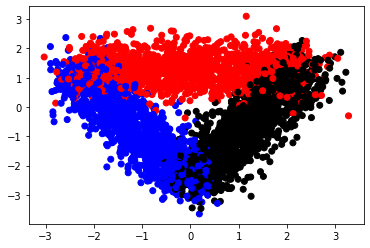

In [52]:
## EJERCICIO 2 (2pt): Reducir la dimensionalidad utilizando análisis de discriminante lineal a 2 dimensiones 
## y dibujarlo
## IMPORTANTE: utilizar el mismo modelo para reducir los datos de prueba
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2).fit(wave_x_train, wave_y_train)

wave_x_reduced_train = lda.transform(wave_x_train).T### SU CODIGO AQUI
wave_x_reduced_test = lda.transform(wave_x_test).T### SU CODIGO AQUI

# Imprimit el training set REDUCIDO a 2 componentes
### REEMPLAZE LOS VALORES TRAIN_SET_REDUCED_X1, TRAIN_SET_REDUCED_X1 & VARIABLE_Y_TRAIN
plt.scatter(wave_x_reduced_train[0], wave_x_reduced_train[1], c=['red' if x==0 else 'blue' if x==1 else 'black' for x in wave_y_train])



In [55]:
## EJERCICIO 3 (2pt): Entrenar un clasificador k-NN con los datos reducidos por discriminante lineal. 
## Con n_neighbors=10 
## debe dar 0.848

# Usar X = wave_x_reduced_train.T, y = wave_y_train
# imprimir el accuracy

knn_lda = KNeighborsClassifier(n_neighbors=k)
knn_lda.fit(wave_x_reduced_train.T,wave_y_train)
y_prima = knn_lda.predict(wave_x_reduced_test.T)
print('Precisión: ', precision_score(wave_y_test, y_prima, average='macro'))

Precisión:  0.8481088505250707
